## FTEC5580 Project 2

### Classification trees with boosting (R Language)

#### Data Preparation

In [2]:
#1st Model: Classification trees with boosting

#Install and load the package tree for decision trees
library(tree)
library(gbm) 
library(pROC)

#Load dataset
dat=read.csv("UCI_Credit_Card.csv")
attach(dat)  # make dat in the search path of R

#Split the dataset into training set and testing set
set.seed(100) #Enable to generate the same result each time
train=sample(nrow(dat), size=20000, replace=FALSE)  # randomly generate 20,000 row numbers to construct the training data
data.train=dat[train,] # training data
data.test=dat[-train,] # test data

print('Training Data')
data.train

print('Testing Data')
data.test

default.test=data.test[,25] # the column of default results in the test data

The following objects are masked from dat (pos = 3):

    AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5,
    BILL_AMT6, EDUCATION, ID, LIMIT_BAL, MARRIAGE, PAY_0, PAY_2, PAY_3,
    PAY_4, PAY_5, PAY_6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4,
    PAY_AMT5, PAY_AMT6, SEX, default.payment.next.month




[1] "Training Data"


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
20170,20170,200000,2,2,1,33,0,0,0,0,⋯,134719,152290,152470,5935,5548,84719,23050,7470,5624,0
16887,16887,80000,1,2,1,39,0,0,0,0,⋯,40771,42087,43409,1626,1663,1684,2000,2000,2000,0
3430,3430,310000,1,3,2,30,-2,-2,-2,-2,⋯,-35,7028,-116,0,8959,0,7063,0,23240,0
3696,3696,50000,2,2,1,44,0,0,2,0,⋯,44287,38113,30778,5000,0,2500,1500,2000,1000,0
20474,20474,20000,1,3,2,27,0,0,-2,-2,⋯,0,0,0,0,0,0,0,0,0,0
24270,24270,20000,1,2,2,24,0,0,0,0,⋯,10474,11198,12198,2000,1254,1000,724,1000,1000,1
3052,3052,390000,1,5,2,29,1,2,0,0,⋯,367400,304990,304303,0,14414,14411,76000,15000,13000,0
11159,11159,180000,2,2,1,38,0,0,0,-2,⋯,0,0,0,1000,0,0,0,0,0,0
8192,8192,180000,2,2,2,25,-1,-1,-1,-1,⋯,1027,596,589,154,2115,1027,596,589,1115,0


[1] "Testing Data"


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0
9,9,140000,2,3,1,28,0,0,2,0,⋯,12211,11793,3719,3329,0,432,1000,1000,1000,0
11,11,200000,2,3,2,34,0,0,2,0,⋯,2513,1828,3731,2306,12,50,300,3738,66,0
12,12,260000,2,1,2,51,-1,-1,-1,-1,⋯,8517,22287,13668,21818,9966,8583,22301,0,3640,0
13,13,630000,2,2,2,41,-1,0,-1,-1,⋯,6500,6500,2870,1000,6500,6500,6500,2870,0,0
17,17,20000,1,1,2,24,0,0,2,2,⋯,18338,17905,19104,3200,0,1500,0,1650,0,1
38,38,60000,2,2,2,22,0,0,0,0,⋯,6026,-28335,18660,1500,1518,2043,0,47671,617,0
39,39,50000,1,1,2,25,1,-1,-1,-2,⋯,0,0,0,780,0,0,0,0,0,1


#### Modelling

gbm(formula = default.payment.next.month ~ . - default.payment.next.month, 
    distribution = "bernoulli", data = data.train[-1], n.trees = 500, 
    interaction.depth = 1, shrinkage = 0.1, cv.folds = 10)
A gradient boosted model with bernoulli loss function.
500 iterations were performed.
The best cross-validation iteration was 457.
There were 23 predictors of which 23 had non-zero influence.

,var,rel.inf
,<chr>,<dbl>
PAY_0,PAY_0,52.9152371
PAY_2,PAY_2,9.9617921
PAY_3,PAY_3,5.0017853
LIMIT_BAL,LIMIT_BAL,3.7794186
PAY_5,PAY_5,3.2295116
BILL_AMT1,BILL_AMT1,2.9476799
PAY_AMT3,PAY_AMT3,2.3705946
PAY_6,PAY_6,2.1872257
BILL_AMT2,BILL_AMT2,1.9268417


[1] "Header for gbm Summary"


[1] "initF"             "fit"               "train.error"      
 [4] "valid.error"       "oobag.improve"     "trees"            
 [7] "c.splits"          "bag.fraction"      "distribution"     
[10] "interaction.depth" "n.minobsinnode"    "num.classes"      
[13] "n.trees"           "nTrain"            "train.fraction"   
[16] "response.name"     "shrinkage"         "var.levels"       
[19] "var.monotone"      "var.names"         "var.type"         
[22] "verbose"           "data"              "Terms"            
[25] "cv.error"          "cv.folds"          "call"             
[28] "m"                 "cv.fitted"

[1] "Iteration with Minimum Cross Validation Error"


[1] 457

[1] "Confusion Matrix"


                      
bst.default.pred.class    0    1
                     0 7481 1368
                     1  365  786

[1] "Prediction Error Rate"
[1] 0.1733


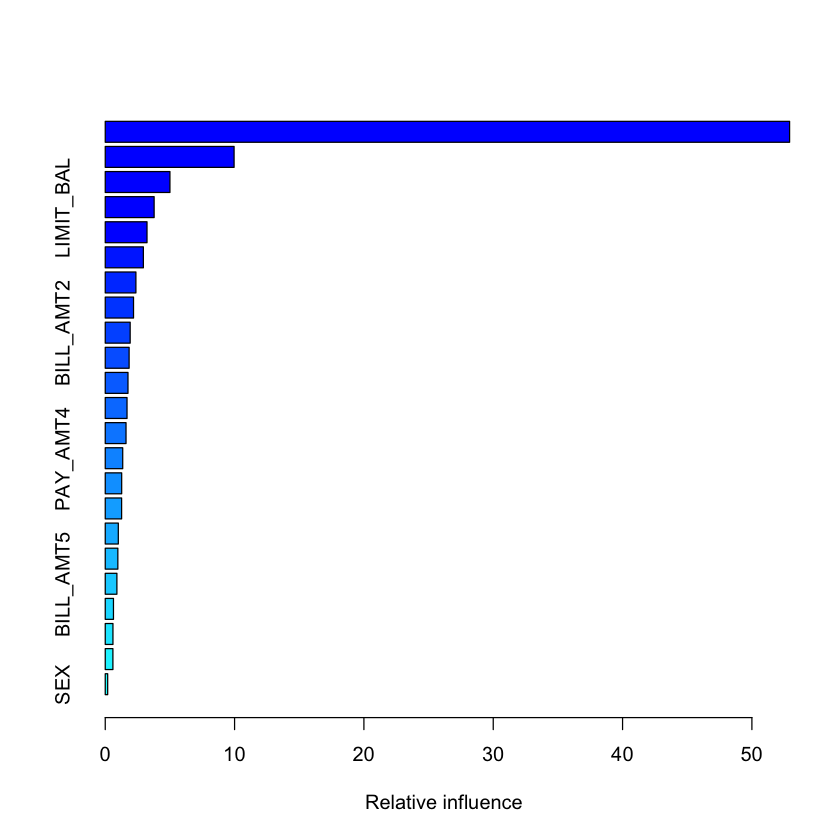

[1] 457

Setting levels: control = 0, case = 1

Setting direction: controls < cases



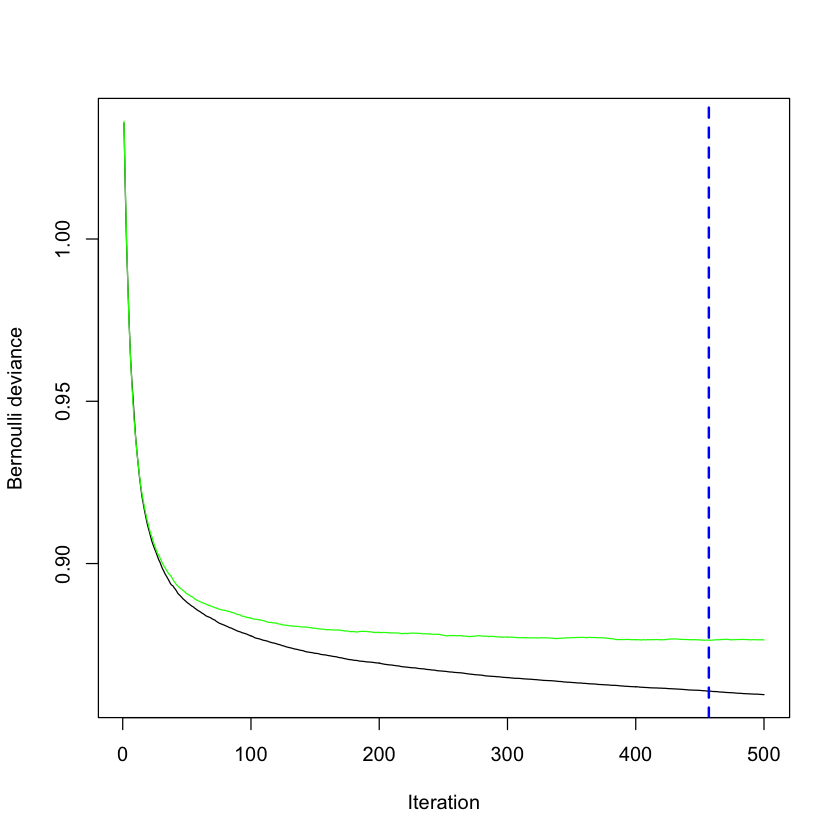


Call:
roc.default(response = data.test$default.payment.next.month,     predictor = bst.default.pred.class, auc = TRUE, plot = TRUE,     main = "ROC Curve")

Data: bst.default.pred.class in 7846 controls (data.test$default.payment.next.month 0) < 2154 cases (data.test$default.payment.next.month 1).
Area under the curve: 0.6592

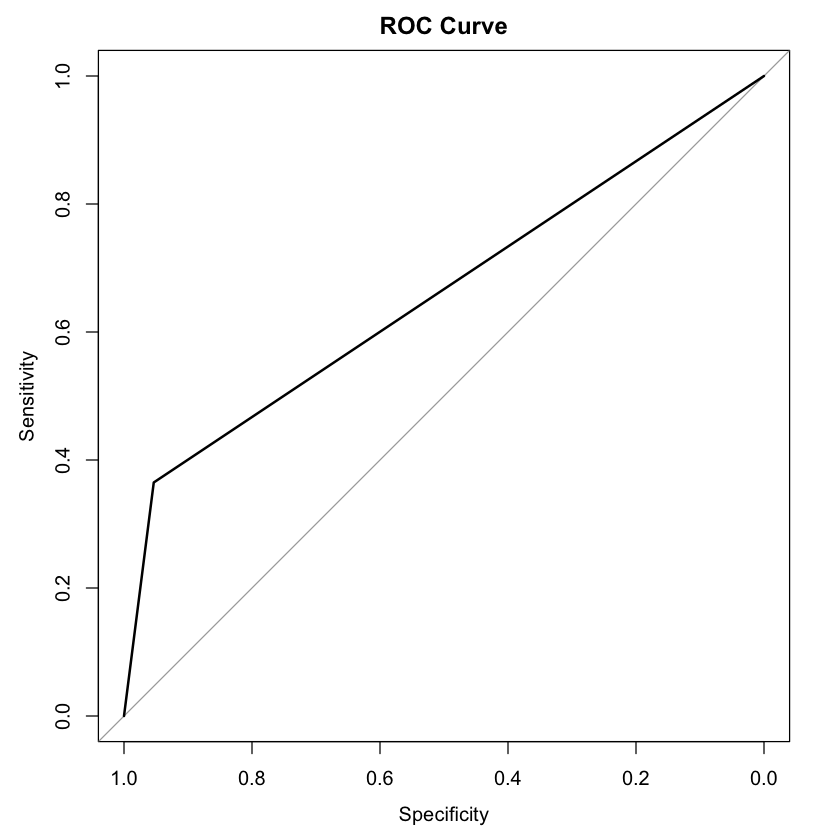

In [3]:
#Classification trees with boosting
# Function gbm() only accepts numerical values for the response. 
# To solve regression problems, set distribution="gaussian".
# The default value for shrinkage is 0.1
# n.trees is the total number of iterations (i.e., the maximum value for B). 
# interaction.depth is d
# shrinkage is lambda
# Variable 'ID' will be excluded from the training data 

set.seed(100) #Enable to generate the same result each time

bst.default = gbm(default.payment.next.month~.-default.payment.next.month, data=data.train[-1], distribution="bernoulli", n.trees =500, interaction.depth=1, shrinkage=0.1, cv.folds=10)
bst.default

# Calling the summary() function shows the relative influence of the predictors. 
summary(bst.default)

#A higher percentage indicates more importance. 

print('Header for gbm Summary')
names(bst.default)

print('Iteration with Minimum Cross Validation Error')
which.min(bst.default$cv.error)
#457

#The relative influence of a features shows the percentage of the reduction of the loss function it accounts for. 

#Confusion Matrix
print('Confusion Matrix')

bst.default.pred=predict(bst.default, newdata=data.test[-1], type="response", n.trees=which.min(bst.default$cv.error))
#The predict() function gives us predicted probability of default for each observation. So we convert it into class using 0.5 as the threshold.

bst.default.pred.class=ifelse(bst.default.pred>0.5,1,0)
bst.default.cmat=table(bst.default.pred.class,data.test$default.payment.next.month)
bst.default.cmat

#Prediction error rate in the test data for the boosted tree
print('Prediction Error Rate')
print((bst.default.cmat[1,2]+bst.default.cmat[2,1])/(bst.default.cmat[1,1]+bst.default.cmat[1,2]+bst.default.cmat[2,1]+bst.default.cmat[2,2]))
#0.1733

#Model Performance per Iteration
gbm.perf(bst.default, method="cv")
#The black line is for the training error and the green line is for the test error. The dashed blue line shows the optimal B.

#ROC Curve
roc(response=data.test$default.payment.next.month, predictor=bst.default.pred.class,auc=TRUE,plot=TRUE, main = "ROC Curve")
#Area under the curve: 0.6592


### Logistic Regression and Deep Learning (Python)

#### Data Preparation

In [14]:
#2nd Model: Logistic regression #Note that the LR model is the simplest NN.
#3rd Model: Deep learning (use a feedforward neural network)

###1. One-hot vectors
#Since Sex, education and marriage are three categorical variables,
#To deal with such variables as inputs to a neural network, we need to use 

##1.0. Install torch package if necessary
#import sys
#!{sys.executable} -m pip install torch

##1.1. Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as Data
import torch.optim as optim
 
#Jupyter command to automatically show figures from matplotlib
%matplotlib inline 

##1.2. Import data
#We use pandas to read data in the Excel file into a DataFrame.
df = pd.read_csv('UCI_Credit_Card.csv')
#df.head(3) #showing the first 3 records for testing

#We delete the "ID" feature and shuffle the data using sample method.
df = df.drop(["ID"], axis=1)
df = df.sample(frac=1)
#df.head(3) #showing the first 3 records for testing

#There are 6636 (28.4%) "yes" data and 23364 (71.6%) "no" data in the dataset.
#print("Yes data:", sum(df["default.payment.next.month"] == 1))
#print("No data:", sum(df["default.payment.next.month"] == 0))

##1.3. Data Standardization
#We can see some feature values are quite large, which is not good for training a neural network
#So we standardize them to make their mean equal to 0 and variance equal to 1.
columns_to_standardize = ["LIMIT_BAL", "AGE", 
                          "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
                          "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                          "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

df[columns_to_standardize] = (df[columns_to_standardize] - np.mean(df[columns_to_standardize], 0)) / np.std(df[columns_to_standardize], 0)   
#the second argument in np.mean and np.std is axis. Setting axis=0 (1) means doing the calculation along columns (rows).
#df.head(5) #showing the first 5 records for testing

##1.4. One-hot Transform
#We need to transform some categorical features to one-hot vectors.
columns_to_one_hot = ["SEX", "EDUCATION", "MARRIAGE"]
one_hot_vectors = []
for column in columns_to_one_hot:
    column_tensor = torch.tensor(df[column].values)
    min_value = column_tensor.min()
    tensor_to_one_hot = column_tensor - min_value
    # print(tensor_to_one_hot.min(), tensor_to_one_hot.max())
    one_hot = torch.nn.functional.one_hot(tensor_to_one_hot)
    print(column, one_hot.shape)
    one_hot_vectors.append(one_hot)
    
    #Output
    #SEX torch.Size([30000, 2])
    #EDUCATION torch.Size([30000, 7])
    #MARRIAGE torch.Size([30000, 4])
    
#We combine all the one-hot vectors together.
one_hot_features = torch.cat(one_hot_vectors, axis=1)
print(one_hot_features.shape) #torch.Size([30000, 13])

#We combine all the features and the label together.
data = torch.cat([torch.tensor(df[columns_to_standardize].values),
                  one_hot_features,
                  torch.tensor(df[["default.payment.next.month"]].values)], axis=1)
feature_num = data.shape[-1] - 1  
#data.shape[-1] shows the number of columns in data. The number of features is the number of columns minus one as we need to exclude the default variable. 

##1.5. Data loader
N_train = 20000
trainData=data[:N_train,:].float()  # Use the first 20000 observations for training and convert this NumPy array into a torch tensor.
testData=data[N_train:,:].float()   # Use the remaining 10000 observations for testing and convert this NumPy array into a torch tensor.
print(trainData.shape) #torch.Size([20000, 34])

#In a standard training procedure, we use DataLoader to distribute a mini-batch of data to each iteration. 
#In some applications the dataset is very large, we should not load the entire dataset all at once or the speed of training is very slow. 
#To use DataLoader, we need to build a TensorDataset first, and then feed the dataset into the data loader.

trainset = Data.TensorDataset(trainData[:, 0:-1], trainData[:, -1:])
# trainData[:, 0:3] gives the inputs, while trainData[:, 3:] provides the output.
# To use pytorch for training NNs, it is very important to match the dimensions of the inputs and the output.
# The inputs to the NN here is a 2D tensor. 
# The colon after "-1" is very important. It keeps trainData[:,-1:] as a 2D tensor. Otherwise it will be a 1D tensor. 
testset = Data.TensorDataset(testData[:, 0:-1], testData[:, -1:])
trainloader = Data.DataLoader(
    trainset, batch_size=200, shuffle=True, num_workers=0)

/var/folders/0p/wklr8kqj0h52vzxckdpz9xhc0000gn/T/ipykernel_999/2685489524.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Sized, KeysView, Sequence


#### Modelling

Logistic Regression Model
[ 1] loss 0.4998 | tp 1236 | tn 14511 | fp 1058 | fn 3195 | acc 0.79
[ 2] loss 0.4683 | tp 1041 | tn 15129 | fp  440 | fn 3390 | acc 0.81
[ 3] loss 0.4677 | tp 1030 | tn 15145 | fp  424 | fn 3401 | acc 0.81
[ 4] loss 0.4680 | tp 1023 | tn 15146 | fp  423 | fn 3408 | acc 0.81
[ 5] loss 0.4683 | tp 1049 | tn 15134 | fp  435 | fn 3382 | acc 0.81
[ 6] loss 0.4674 | tp 1056 | tn 15131 | fp  438 | fn 3375 | acc 0.81
[ 7] loss 0.4682 | tp 1080 | tn 15130 | fp  439 | fn 3351 | acc 0.81
[ 8] loss 0.4672 | tp 1050 | tn 15140 | fp  429 | fn 3381 | acc 0.81
[ 9] loss 0.4677 | tp 1034 | tn 15139 | fp  430 | fn 3397 | acc 0.81
[10] loss 0.4680 | tp 1051 | tn 15138 | fp  431 | fn 3380 | acc 0.81
[11] loss 0.4680 | tp 1051 | tn 15102 | fp  467 | fn 3380 | acc 0.81
[12] loss 0.4673 | tp 1067 | tn 15133 | fp  436 | fn 3364 | acc 0.81
[13] loss 0.4675 | tp 1070 | tn 15146 | fp  423 | fn 3361 | acc 0.81
[14] loss 0.4677 | tp 1037 | tn 15137 | fp  432 | fn 3394 | acc 0.81
[15] los

[19] loss 0.4220 | tp 1530 | tn 14889 | fp  680 | fn 2901 | acc 0.82
[20] loss 0.4226 | tp 1563 | tn 14897 | fp  672 | fn 2868 | acc 0.82
[21] loss 0.4193 | tp 1563 | tn 14900 | fp  669 | fn 2868 | acc 0.82
[22] loss 0.4189 | tp 1553 | tn 14911 | fp  658 | fn 2878 | acc 0.82
[23] loss 0.4180 | tp 1569 | tn 14901 | fp  668 | fn 2862 | acc 0.82
[24] loss 0.4181 | tp 1561 | tn 14909 | fp  660 | fn 2870 | acc 0.82
[25] loss 0.4170 | tp 1573 | tn 14876 | fp  693 | fn 2858 | acc 0.82
[26] loss 0.4155 | tp 1528 | tn 14926 | fp  643 | fn 2903 | acc 0.82
[27] loss 0.4142 | tp 1539 | tn 14909 | fp  660 | fn 2892 | acc 0.82
[28] loss 0.4149 | tp 1586 | tn 14882 | fp  687 | fn 2845 | acc 0.82
[29] loss 0.4134 | tp 1575 | tn 14905 | fp  664 | fn 2856 | acc 0.82
[30] loss 0.4154 | tp 1603 | tn 14870 | fp  699 | fn 2828 | acc 0.82
[31] loss 0.4131 | tp 1568 | tn 14931 | fp  638 | fn 2863 | acc 0.82
[32] loss 0.4140 | tp 1609 | tn 14865 | fp  704 | fn 2822 | acc 0.82
[33] loss 0.4109 | tp 1548 | tn 14

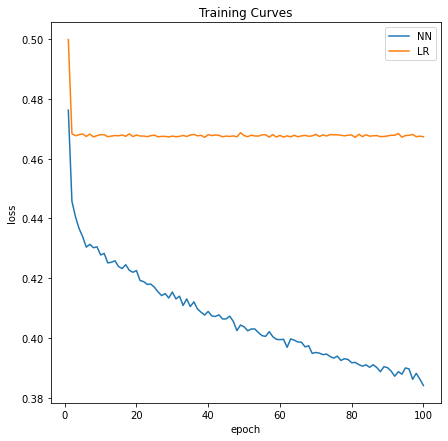

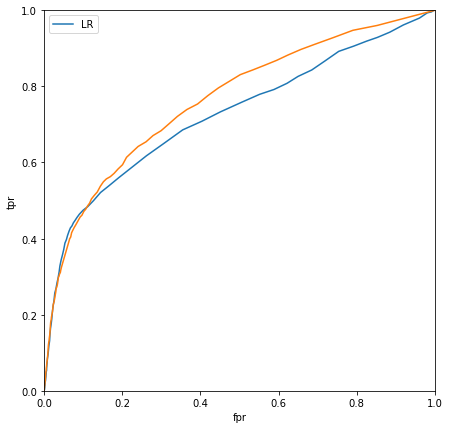

In [36]:
###2. Model
#2.1. We build two models: a neural network (NN) and a logistic regression (LR) model.
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()  # inherit methods from torch.nn.Module
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)  # hidden layer 1
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)  # hidden layer 2
        self.output = torch.nn.Linear(n_hidden2, n_output)  # output layer

    def forward(self, x):
        x = torch.relu_(self.hidden1(x))  # relu
        x = torch.relu_(self.hidden2(x))  # relu
        x = torch.sigmoid_(self.output(x))  # sigmoid
        return x


class Logistic(torch.nn.Module):
    def __init__(self, n_feature):
        super(Logistic, self).__init__()
        self.output = torch.nn.Linear(n_feature, 1)

    def forward(self, x):
        x = torch.sigmoid_(self.output(x))
        return x
    
#The underscore after relu and sigmoid mean in-place operations. 
#The tensor input into these functions will be modified without making a copy, so no new memory is allocated for the tensor.  

#2.2. We build train function for modelling later
#For this 2-class classification problem, we use binary cross entropy loss (BCELoss in PyTorch).
criterion = torch.nn.BCELoss()  # use binary cross entropy for the loss function
# For using MSE as the loss function, type torch.nn.MSELoss() 

def train(model, num_epoch):
    # SGD with momentum:
    # optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
    # Adam:
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    # For other optimizers, see the link https://pytorch.org/docs/stable/optim.html.
    loss_list = []  # record loss
    for epoch in range(num_epoch):  # loop over the dataset multiple times; range(num_epoch) creates an array [0,1,...num_epoch-1].
        running_loss = 0.0
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for data in trainloader:
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(inputs)  # use forward propagation to get the output
            loss = criterion(outputs, labels)  # get the loss
            loss.backward()  # use backward propagation to calculate the gradients of the loss function
            optimizer.step()  # moving one step in optimization

            # record loss and other statistics
            # .shape[0] shows the number of rows
            running_loss += inputs.shape[0] * loss.item()
            predicted = outputs > 0.5
            tp += ((predicted == labels) & (labels == 1)
                   ).sum().item()  # true positive
            tn += ((predicted == labels) & (labels == 0)
                   ).sum().item()  # true negative
            fp += ((predicted != labels) & (labels == 0)
                   ).sum().item()  # false positive
            fn += ((predicted != labels) & (labels == 1)
                   ).sum().item()  # false negative
            
        print('[%2d] loss %.4f | tp %4d | tn %4d | fp %4d | fn %4d | acc %2.2f' %
              (epoch+1, running_loss / trainData.shape[0], tp, tn, fp, fn, (tp+tn)/(tp+tn+fp+fn)))
        loss_list.append(running_loss / trainData.shape[0])
    print('Finished Training')
    return loss_list

#2.3. Train models
#Logistic regression
print('Logistic Regression Model')
lr = Logistic(33)
loss_lr = train(lr, 100)

#Deep learning (use a feedforward neural network)
print('Deep Learning Model')
net = Net(33, 30, 30, 1)
loss_net = train(net, 100)

#2.4. Training Curve
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(range(1, 1+len(loss_net)), loss_net, label="NN")
ax.plot(range(1, 1+len(loss_lr)), loss_lr, label="LR")
ax.set_title("Training Curves")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.legend()

#2.5. ROC Curve
def roc(model, testset, ax, modelName):
    model.eval()                 # enter the evaluation mode, so no changes made to the model
    with torch.no_grad():        # don't calculate gradient
        threshold = np.linspace(0, 1, 101)
        tp = np.zeros_like(threshold)
        tn = np.zeros_like(threshold)
        fp = np.zeros_like(threshold)
        fn = np.zeros_like(threshold)

        inputs, labels = testset[:]
        labels = labels.data.numpy()  # convert from pytorch tensor to numpy array
        outputs = model(inputs).data.numpy()
        predicted = outputs > threshold  # broadcasting to get a 2D array of size 200*101
        tp += np.sum(((predicted == labels) & (labels == 1)), 0)
        tn += np.sum(((predicted == labels) & (labels == 0)), 0)
        fp += np.sum(((predicted != labels) & (labels == 0)), 0)
        fn += np.sum(((predicted != labels) & (labels == 1)), 0)

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        ax.plot(fpr, tpr, label=modelName)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])

        acc = (tp+tn)/(tp+tn+fp+fn)
        err = (fp+fn)/(tp+tn+fp+fn)
        print("Accuracy for threshold = 50%:", acc[(len(threshold)-1)//2])
        print("Overall Error Rate", err[(len(threshold)-1)//2])
        
        AUC=-np.trapz(y=tpr,x=fpr)
        print("AUC:", AUC)


fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlabel("fpr")
ax.set_ylabel("tpr")

print("LR:")
roc(lr, testset, ax, "LR")
ax.legend()
#Accuracy for threshold = 50%: 0.8107
#Overall Error Rate 0.1893
#AUC: 0.7259477919882942

print("NN:")
roc(net, testset, ax, "NN")
#Accuracy for threshold = 50%: 0.8165
#Overall Error Rate 0.1835
#AUC: 0.7643924313364432


#### Task (1) Report the overall error rate and AUC of three models on the training and test sets and compare them.

##### Classification trees with boosting
The following recaps that the overall error rate of classification trees with boosting is 0.1733 while the AUC is 0.6592. ROC curve is shown below.

[1] "Overall Error Rate"
[1] 0.1733


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data.test$default.payment.next.month,     predictor = bst.default.pred.class, auc = TRUE, plot = TRUE,     main = "ROC Curve")

Data: bst.default.pred.class in 7846 controls (data.test$default.payment.next.month 0) < 2154 cases (data.test$default.payment.next.month 1).
Area under the curve: 0.6592

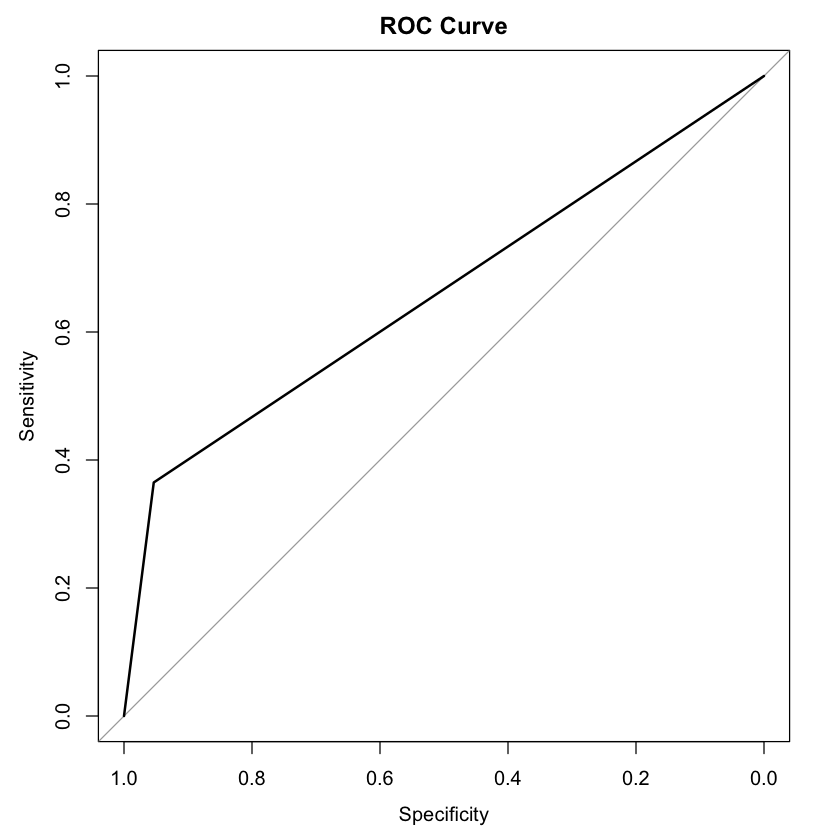

In [4]:
#Overall error rate
print('Overall Error Rate')
print((bst.default.cmat[1,2]+bst.default.cmat[2,1])/(bst.default.cmat[1,1]+bst.default.cmat[1,2]+bst.default.cmat[2,1]+bst.default.cmat[2,2]))
#0.1733

#ROC Curve
roc(response=data.test$default.payment.next.month, predictor=bst.default.pred.class,auc=TRUE,plot=TRUE, main = "ROC Curve")
#Area under the curve: 0.6592

##### Logistic regression
The following recaps that the overall error rate of logistic regression is 0.1893 while the AUC is 0.7259477919882942. ROC curve is shown below.

Accuracy for threshold = 50%: 0.8107
Overall Error Rate 0.1893
AUC: 0.7259477919882942


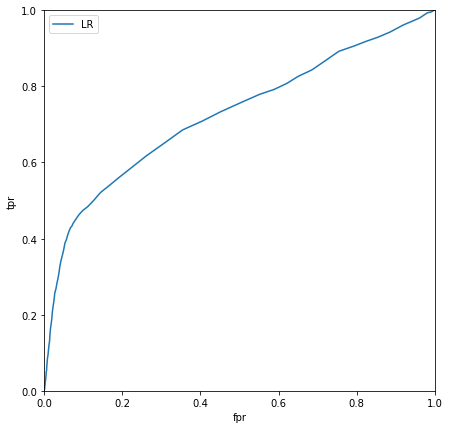

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlabel("fpr")
ax.set_ylabel("tpr")

roc(lr, testset, ax, "LR")
ax.legend()

#Accuracy for threshold = 50%: 0.8107
#Overall Error Rate 0.1893
#AUC: 0.7259477919882942

##### Deep learning (use a feedforward neural network)
The following recaps that the overall error rate of deep learning model is 0.1835 while the AUC is 0.7643924313364432. ROC curve is shown below.

Accuracy for threshold = 50%: 0.8165
Overall Error Rate 0.1835
AUC: 0.7643924313364432


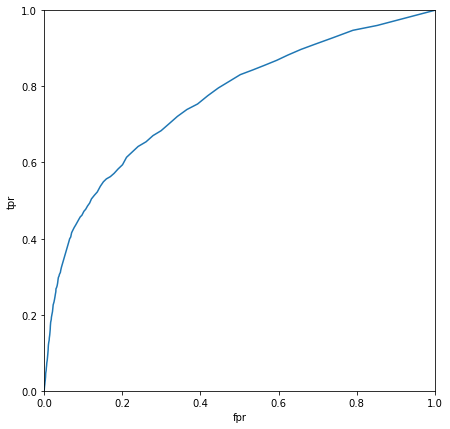

In [38]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlabel("fpr")
ax.set_ylabel("tpr")

roc(net, testset, ax, "NN")

#Accuracy for threshold = 50%: 0.8165
#Overall Error Rate 0.1835
#AUC: 0.7643924313364432

#### Performance Summary of three models
From the table below, we can compare the performance of the three models we used (i.e. Classification Tree, Logistic Regression and Deep Learning)

If considering the overall error rate, classification trees with boosting performed the best as the rate is the smallest among the models.

If considering the AUC, deep learning performed the best as the AUC is the largest among models.

In [6]:
#import sys
#!{sys.executable} -m pip install PrettyTable

from prettytable import PrettyTable

table = [['Model', 'Overall Error Rate', 'Area under the ROC Curve (AUC)'], ['Classification Trees with Boosting', 0.1733, 0.6592], ['Logistic Regression', 0.1893, format(0.7259477919882942,'.4f')], ['Deep Learning', 0.1835, format(0.7643924313364432,'.4f')]]
tab = PrettyTable(table[0])
tab.add_rows(table[1:])

print(tab)

+------------------------------------+--------------------+--------------------------------+
|               Model                | Overall Error Rate | Area under the ROC Curve (AUC) |
+------------------------------------+--------------------+--------------------------------+
| Classification Trees with Boosting |       0.1733       |             0.6592             |
|        Logistic Regression         |       0.1893       |             0.7259             |
|           Deep Learning            |       0.1835       |             0.7644             |
+------------------------------------+--------------------+--------------------------------+


#### Task (2) Determine the variables are important for predicting defaults
The following table lists out the relative influence of all variable used in model. Relative influence refers to the percentage of the reduction of the loss function it accounts for. The higher relative influence, the more important the variable in modelling. 

Therefore, the most important variable is 'PAY_0' (i.e. Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, . . . 8=payment delay for eight months, 9=pay- ment delay for nine months and above; you also see -2 in the dataset and its meaning is not explained by the data provider but it could refer to prepayment)) as its relative influence is 52.9152371, which is the largest among the variables.

On the other hand, the least important variable is 'SEX' (i.e. gender) as its relative influence is 0.1882815, which is the smallest among the variables.

Moreover, we can find the pattern of variable importance. Previous months' repayment status is mainly important in modelling as most of their relative influence (for example, variables 'PAY_2', 'PAY_3', 'PAY_5') are relatively larger than the other variables. 

Followed by the past repayment status, the sequence of the variable importance (from the most to the least) is as follows: 
- Credit Data (i.e. 'LIMIT_BAL')
- Previous payment amount (e.g. 'PAY_AMT3', 'PAY_AMT2','PAY_AMT1')
- Previous bill amount (e.g. 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3')
- Demographic information of credit card client (e.g. 'AGE', 'EDUCATION', 'MARRIAGE')

,var,rel.inf
,<chr>,<dbl>
PAY_0,PAY_0,52.9152371
PAY_2,PAY_2,9.9617921
PAY_3,PAY_3,5.0017853
LIMIT_BAL,LIMIT_BAL,3.7794186
PAY_5,PAY_5,3.2295116
BILL_AMT1,BILL_AMT1,2.9476799
PAY_AMT3,PAY_AMT3,2.3705946
PAY_6,PAY_6,2.1872257
BILL_AMT2,BILL_AMT2,1.9268417


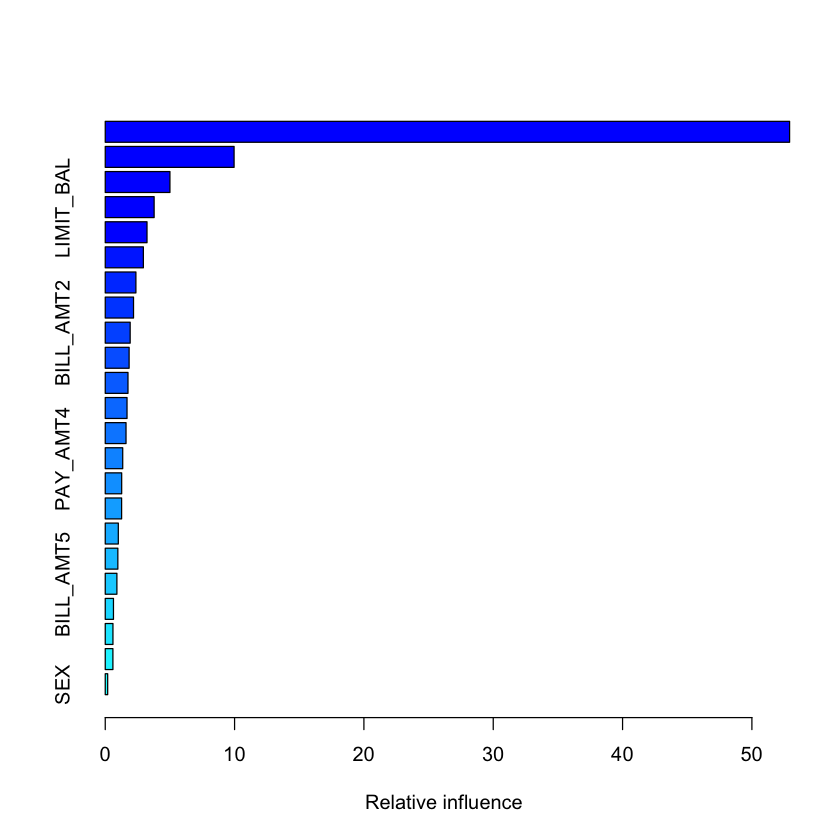

In [8]:
summary(bst.default)